In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t

# Zad1

In [32]:
def least_squares(data1, data2):
    x_mean = np.mean(data1)
    y_mean = np.mean(data2)
    b1 = np.sum((data1 - x_mean) * data2) / np.sum((data1 - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    return b0, b1

In [48]:
b0, b1 = 2, 4

B0: [[0.2329411764705883, 0.2140707720200466], [0.1182178217821782, 0.10804959157209397], [0.011982017982017982, 0.012085536103890928]]
B1: [[0.6917647058823531, 0.6333508641609316], [0.3528712871287128, 0.3307123879682779], [0.03592807192807193, 0.036630205901736226]]


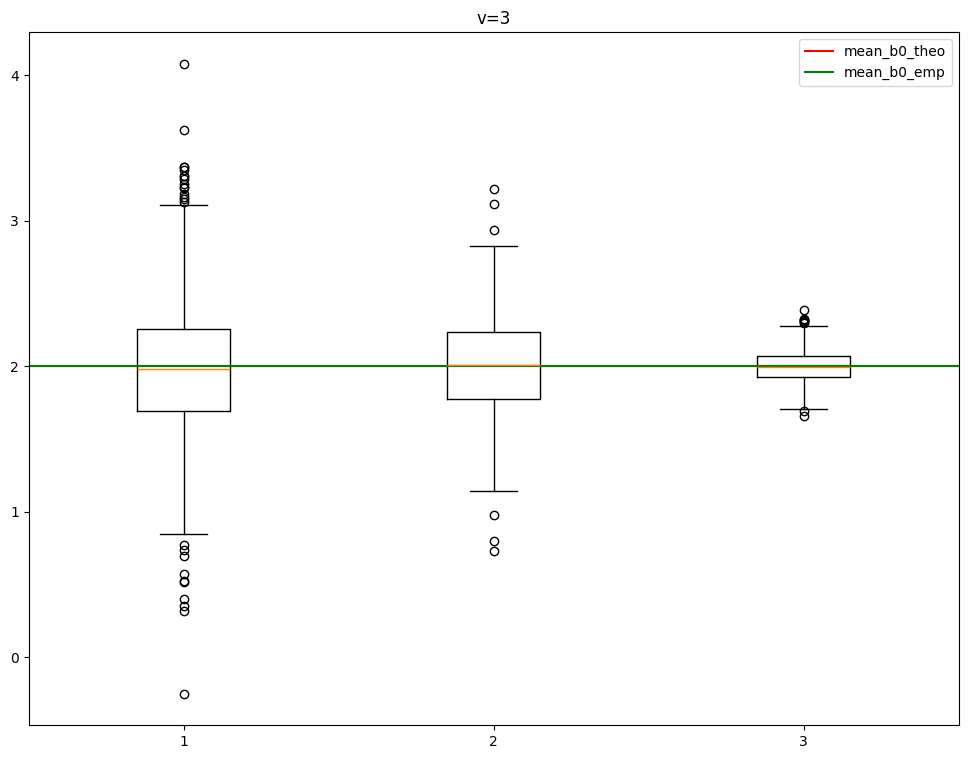

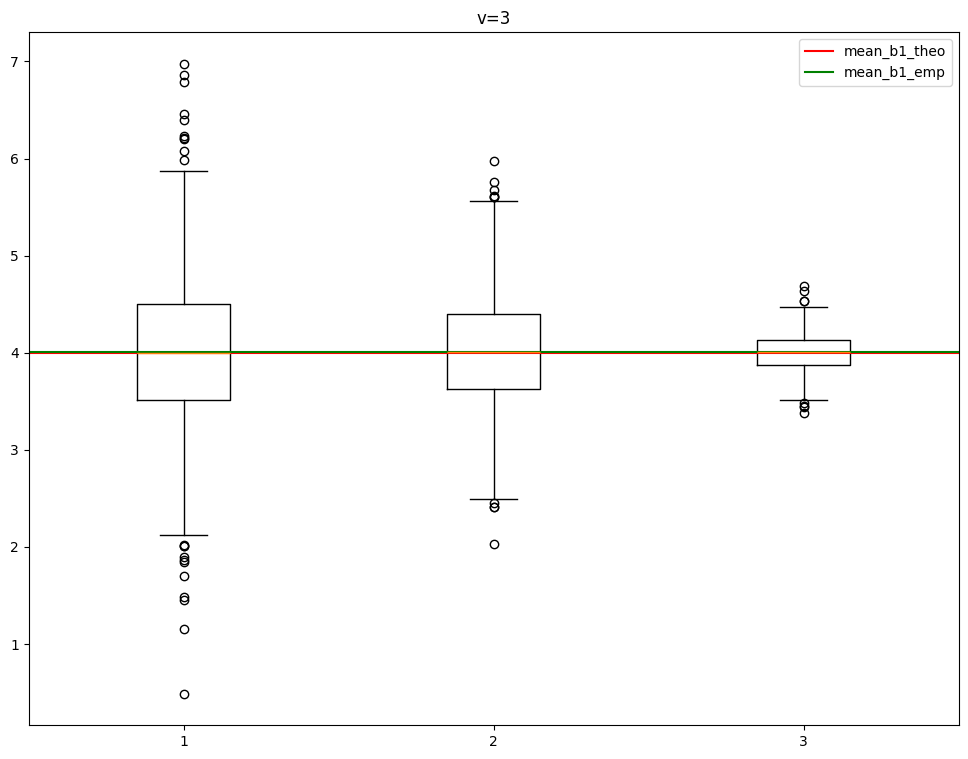

In [49]:
N = 1000
n = [50, 100, 1000]
v_el = 3

# rozkład t-Studenta
b0_falka_list_list = []
b1_falka_list_list = []
b0_var_list = []
b1_var_list = []
for n_el in n:
    b0_falka_list = np.zeros(N)
    b1_falka_list = np.zeros(N)
    arr = np.linspace(0, 1, n_el)
    x_mean = np.mean(arr)
    for i in range(N):
        eps = np.random.standard_t(df=v_el, size=n_el)
        yi = b0 + b1 * arr + eps
        b0_falka, b1_falka = least_squares(arr, yi)
        b0_falka_list[i] = b0_falka
        b1_falka_list[i] = b1_falka
    b1_falka_list_list.append(b1_falka_list)
    b0_falka_list_list.append(b0_falka_list)
    mean_b0_emp = np.mean(b0_falka_list)
    mean_b1_emp = np.mean(b1_falka_list)
    mean_b1_theo = b1
    mean_b0_theo = b0
    var_b0_emp = np.var(b0_falka_list)
    var_b1_emp = np.var(b1_falka_list)
    var_b1_theo = (v_el / (v_el - 2)) * (1 / np.sum((arr - x_mean) ** 2))
    var_b0_theo = v_el / (v_el - 2) * (1 / n_el + x_mean ** 2 / np.sum((arr - x_mean) ** 2))
    b0_var_list.append([var_b0_theo, var_b0_emp])
    b1_var_list.append([var_b1_theo, var_b1_emp])
    
plt.figure(figsize=(12,9))
plt.title(f'v={v_el}')
plt.boxplot(b0_falka_list_list)
plt.axhline(mean_b0_theo, color='r', label='mean_b0_theo')
plt.axhline(mean_b0_emp, color='g', label='mean_b0_emp')
plt.legend()
print(f'B0: {b0_var_list}')

plt.figure(figsize=(12,9))
plt.title(f'v={v_el}')
plt.boxplot(b1_falka_list_list)
plt.axhline(mean_b1_theo, color='r', label='mean_b1_theo')
plt.axhline(mean_b1_emp, color='g', label='mean_b1_emp')
plt.legend()
print(f'B1: {b1_var_list}')
plt.show()
        
        
        
        

B0: [[0.1182178217821782, 0.13291020697579925], [0.0788118811881188, 0.08378120876316635], [0.06567656765676567, 0.06162680028077062], [0.049257425742574246, 0.04580205325200558], [0.04546839299314546, 0.043039863645697465], [0.042832544123977606, 0.04378437257735594]]
B1: [[0.3528712871287128, 0.3741699560036066], [0.2352475247524752, 0.24473322926839608], [0.19603960396039602, 0.1829021824669196], [0.147029702970297, 0.1425554461832849], [0.13571972581873568, 0.12718479647300288], [0.1278519156263452, 0.13666884827389622]]


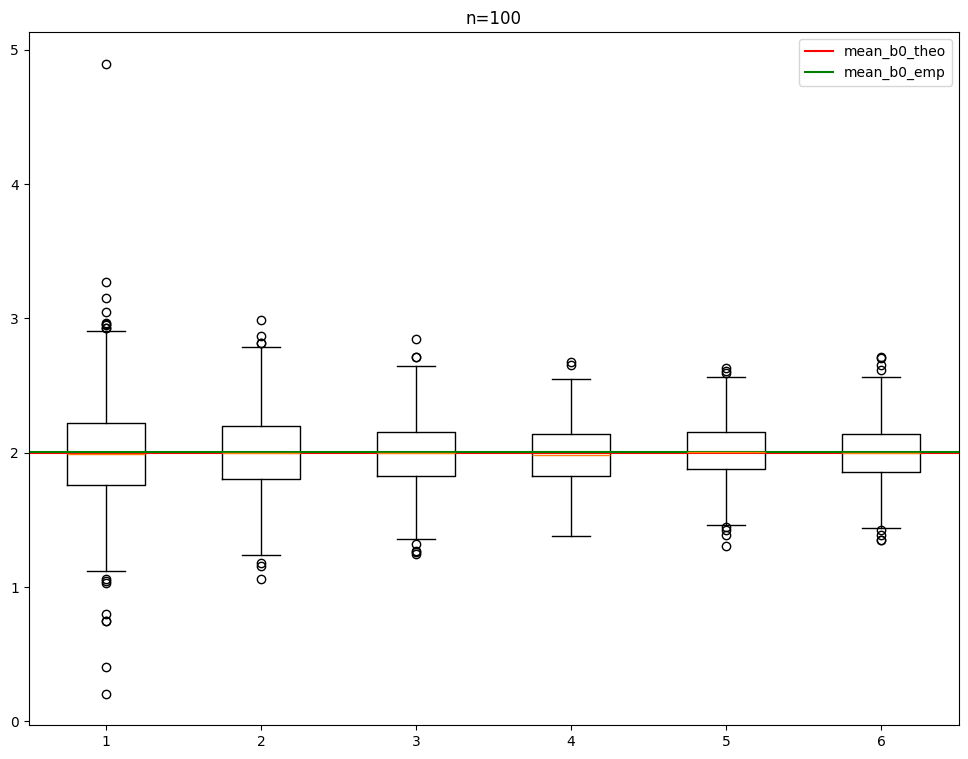

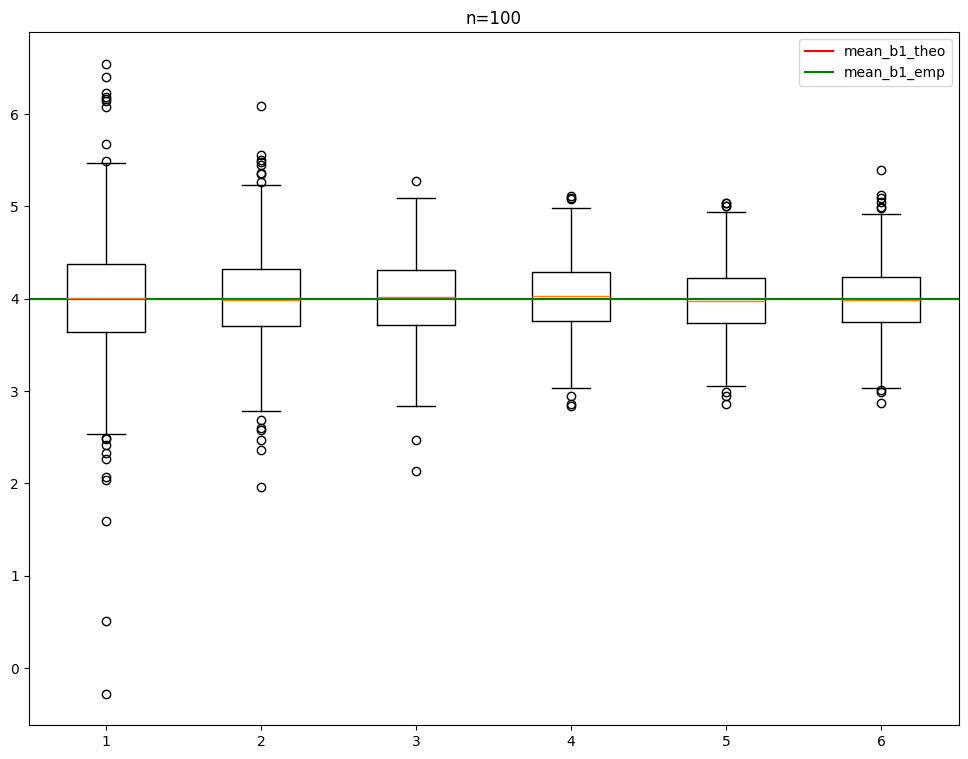

In [54]:
N = 1000
n_el = 100
v = [3, 4, 5, 10, 15, 25]

# rozkład t-Studenta
b0_falka_list_list = []
b1_falka_list_list = []
b0_var_list = []
b1_var_list = []
for v_el in v:
    b0_falka_list = np.zeros(N)
    b1_falka_list = np.zeros(N)
    arr = np.linspace(0, 1, n_el)
    x_mean = np.mean(arr)
    for i in range(N):
        eps = np.random.standard_t(df=v_el, size=n_el)
        yi = b0 + b1 * arr + eps
        b0_falka, b1_falka = least_squares(arr, yi)
        b0_falka_list[i] = b0_falka
        b1_falka_list[i] = b1_falka
    b1_falka_list_list.append(b1_falka_list)
    b0_falka_list_list.append(b0_falka_list)
    mean_b0_emp = np.mean(b0_falka_list)
    mean_b1_emp = np.mean(b1_falka_list)
    mean_b1_theo = b1
    mean_b0_theo = b0
    var_b0_emp = np.var(b0_falka_list)
    var_b1_emp = np.var(b1_falka_list)
    var_b1_theo = (v_el / (v_el - 2)) * (1 / np.sum((arr - x_mean) ** 2))
    var_b0_theo = v_el / (v_el - 2) * (1 / n_el + x_mean ** 2 / np.sum((arr - x_mean) ** 2))
    b0_var_list.append([var_b0_theo, var_b0_emp])
    b1_var_list.append([var_b1_theo, var_b1_emp])
    
plt.figure(figsize=(12,9))
plt.title(f'n={n_el}')
plt.boxplot(b0_falka_list_list)
plt.axhline(mean_b0_theo, color='r', label='mean_b0_theo')
plt.axhline(mean_b0_emp, color='g', label='mean_b0_emp')
plt.legend()
print(f'B0: {b0_var_list}')

plt.figure(figsize=(12,9))
plt.title(f'n={n_el}')
plt.boxplot(b1_falka_list_list)
plt.axhline(mean_b1_theo, color='r', label='mean_b1_theo')
plt.axhline(mean_b1_emp, color='g', label='mean_b1_emp')
plt.legend()
print(f'B1: {b1_var_list}')
plt.show()
        
        
        
        

B0: [[0.07764705882352943, 0.08259252369366064], [0.0394059405940594, 0.03629243712123161], [0.003994005994005994, 0.004000042483033463]]
3
B1: [[0.2305882352941177, 0.24993018549501897], [0.1176237623762376, 0.10828556743770497], [0.011976023976023976, 0.012225176994610329]]


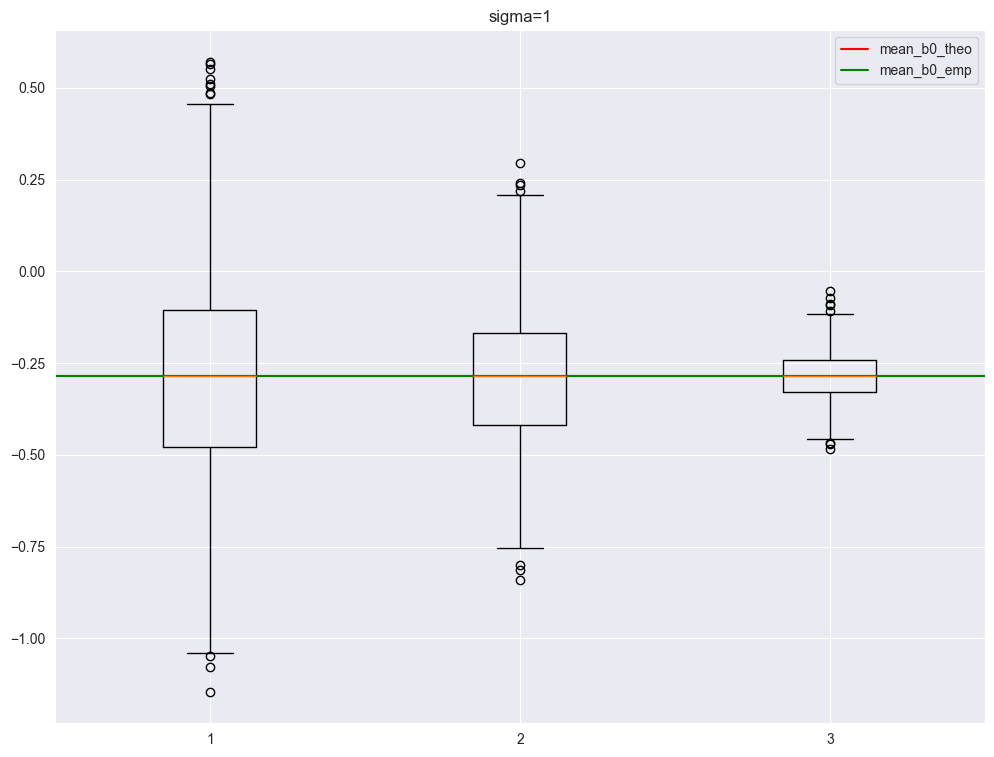

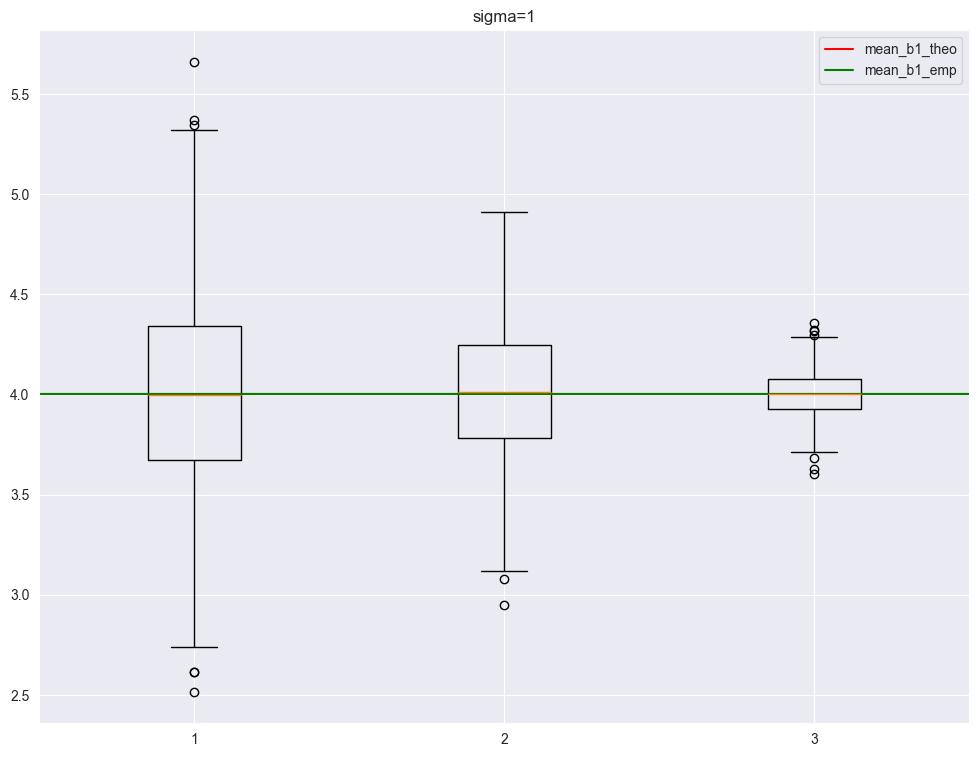

In [58]:
N = 1000
n = [50, 100, 1000]
sigma_el = 1

# rozkład normalny
b0_falka_list_list = []
b1_falka_list_list = []
b0_var_list = []
b1_var_list = []
for n_el in n:
    b0_falka_list = np.zeros(N)
    b1_falka_list = np.zeros(N)
    arr = np.linspace(0, 1, n_el)
    x_mean = np.mean(arr)
    for i in range(N):
        eps = np.random.normal(0, sigma_el, n_el)
        yi = b0 + b1 * arr + eps
        b0_falka, b1_falka = least_squares(arr, yi)
        b0_falka_list[i] = b0_falka
        b1_falka_list[i] = b1_falka
    b1_falka_list_list.append(b1_falka_list)
    b0_falka_list_list.append(b0_falka_list)
    mean_b0_emp = np.mean(b0_falka_list)
    mean_b1_emp = np.mean(b1_falka_list)
    mean_b1_theo = b1
    mean_b0_theo = b0
    var_b0_emp = np.var(b0_falka_list)
    var_b1_emp = np.var(b1_falka_list)
    var_b1_theo = sigma_el ** 2 / np.sum((arr - x_mean) ** 2)
    var_b0_theo = sigma_el ** 2 * (1 / n_el + x_mean ** 2 / np.sum((arr - x_mean) ** 2))
    b0_var_list.append([var_b0_theo, var_b0_emp])
    b1_var_list.append([var_b1_theo, var_b1_emp])
    
plt.figure(figsize=(12,9))
plt.title(f'sigma={sigma_el}')
plt.boxplot(b0_falka_list_list)
plt.axhline(mean_b0_theo, color='r', label='mean_b0_theo')
plt.axhline(mean_b0_emp, color='g', label='mean_b0_emp')
plt.legend()
print(f'B0: {b0_var_list}')

plt.figure(figsize=(12,9))
plt.title(f'sigma={sigma_el}')
plt.boxplot(b1_falka_list_list)
plt.axhline(mean_b1_theo, color='r', label='mean_b1_theo')
plt.axhline(mean_b1_emp, color='g', label='mean_b1_emp')
plt.legend()
print(f'B1: {b1_var_list}')
plt.show()
        
        
        
        

B0: [[0.0394059405940594, 0.03866418617733572], [0.1576237623762376, 0.14986508125221967], [0.3546534653465346, 0.3413557116512418], [0.985148514851485, 1.004518063920538]]
B1: [[0.1176237623762376, 0.11436072776037748], [0.4704950495049504, 0.4423861413179236], [1.0586138613861384, 0.9987879580244373], [2.94059405940594, 2.7195931136364613]]


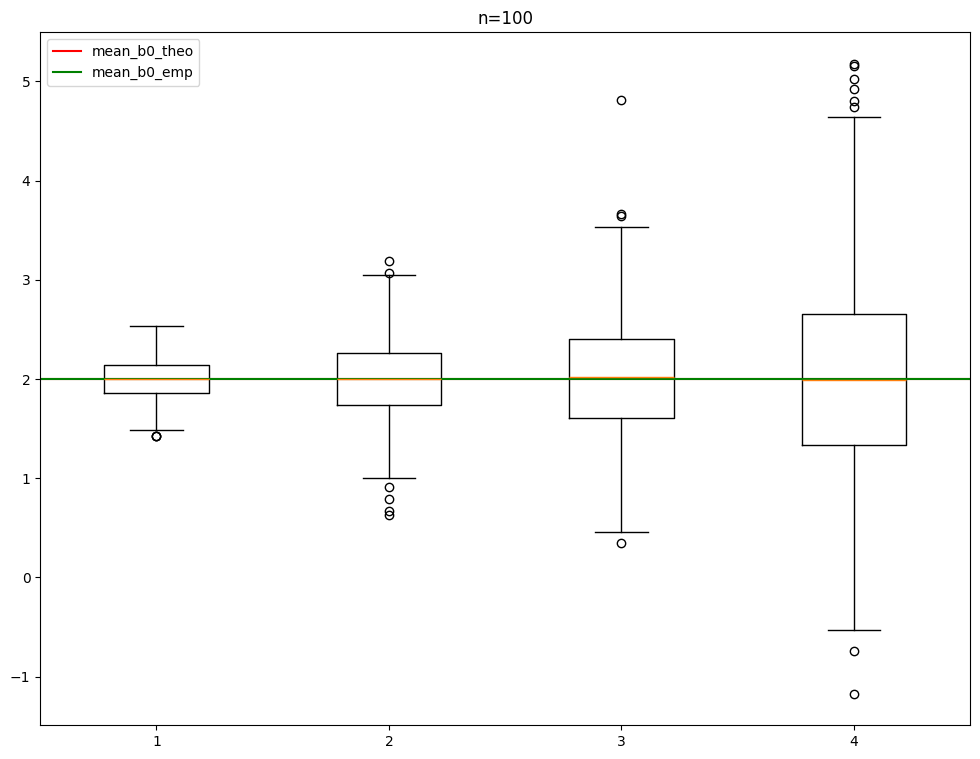

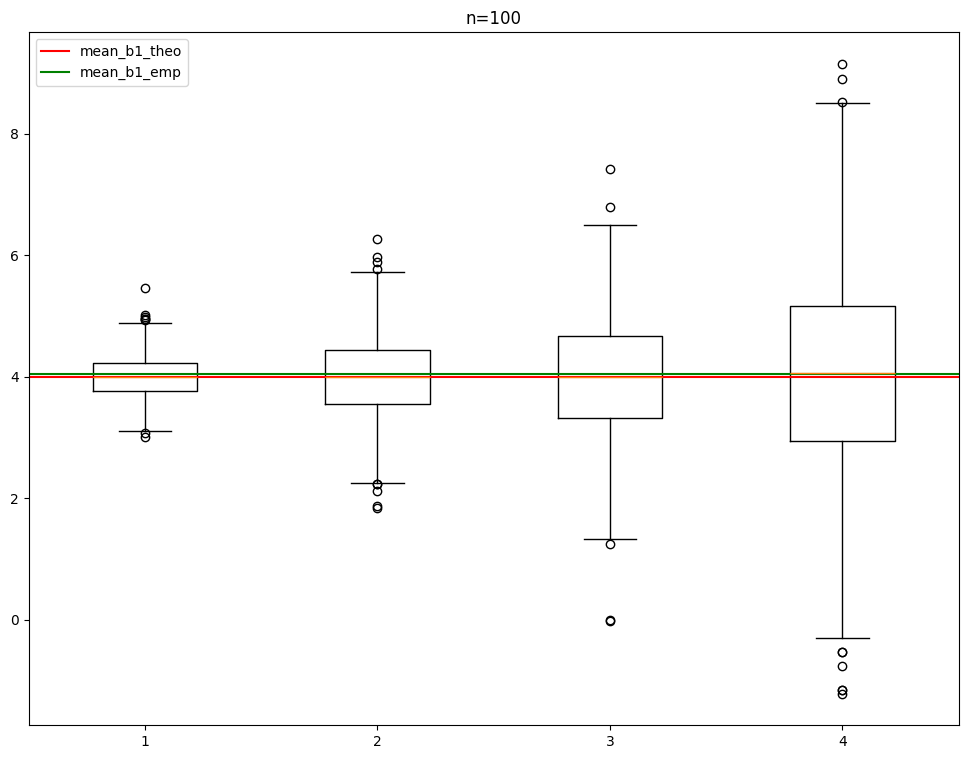

In [52]:
N = 1000
n_el = 100
sigma = [1, 2, 3, 5]

# rozkład normalny
b0_falka_list_list = []
b1_falka_list_list = []
b0_var_list = []
b1_var_list = []
for sigma_el in sigma:
    b0_falka_list = np.zeros(N)
    b1_falka_list = np.zeros(N)
    arr = np.linspace(0, 1, n_el)
    x_mean = np.mean(arr)
    for i in range(N):
        eps = np.random.normal(0, sigma_el, n_el)
        yi = b0 + b1 * arr + eps
        b0_falka, b1_falka = least_squares(arr, yi)
        b0_falka_list[i] = b0_falka
        b1_falka_list[i] = b1_falka
    b1_falka_list_list.append(b1_falka_list)
    b0_falka_list_list.append(b0_falka_list)
    mean_b0_emp = np.mean(b0_falka_list)
    mean_b1_emp = np.mean(b1_falka_list)
    mean_b1_theo = b1
    mean_b0_theo = b0
    var_b0_emp = np.var(b0_falka_list)
    var_b1_emp = np.var(b1_falka_list)
    var_b1_theo = sigma_el ** 2 / np.sum((arr - x_mean) ** 2)
    var_b0_theo = sigma_el ** 2 * (1 / n_el + x_mean ** 2 / np.sum((arr - x_mean) ** 2))
    b0_var_list.append([var_b0_theo, var_b0_emp])
    b1_var_list.append([var_b1_theo, var_b1_emp])
    
plt.figure(figsize=(12,9))
plt.title(f'n={n_el}')
plt.boxplot(b0_falka_list_list)
plt.axhline(mean_b0_theo, color='r', label='mean_b0_theo')
plt.axhline(mean_b0_emp, color='g', label='mean_b0_emp')
plt.legend()
print(f'B0: {b0_var_list}')

plt.figure(figsize=(12,9))
plt.title(f'n={n_el}')
plt.boxplot(b1_falka_list_list)
plt.axhline(mean_b1_theo, color='r', label='mean_b1_theo')
plt.axhline(mean_b1_emp, color='g', label='mean_b1_emp')
plt.legend()
print(f'B1: {b1_var_list}')
plt.show()  

# Zad2

B1: [[0.0593939393939394, 0.05732128917481563], [0.02984924623115577, 0.02842472552968569], [0.0029984992496248125, 0.00304316308737304]]


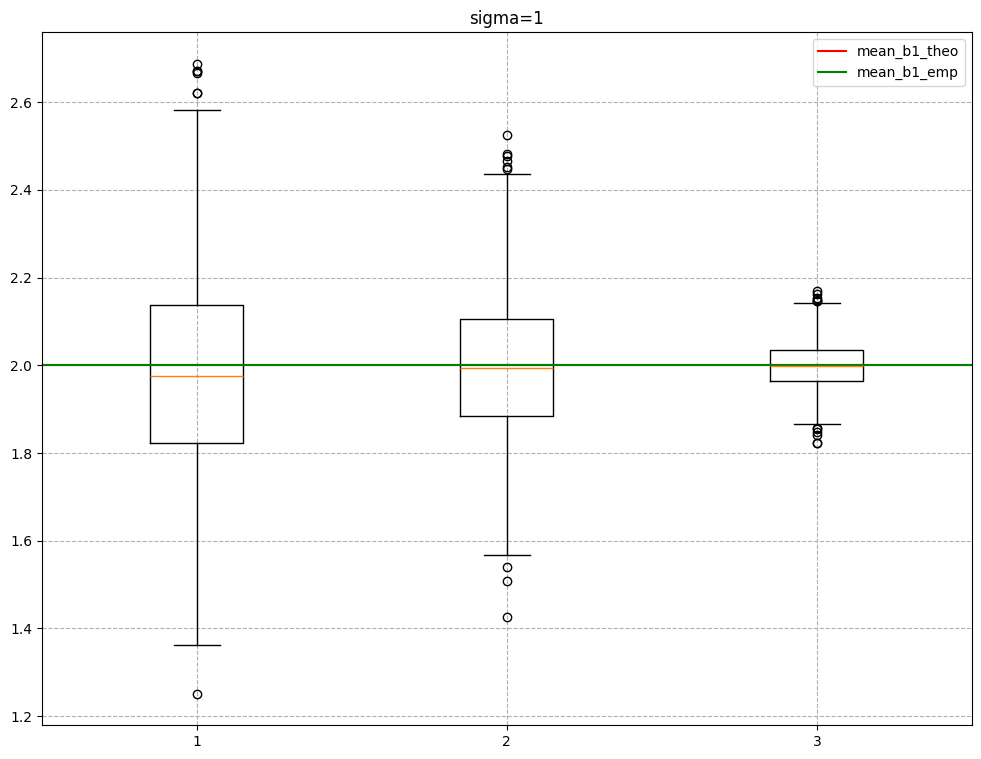

In [64]:
N = 1000
n = [50, 100, 1000]
sigma_el = 1
b1 = 2

# rozkład normalny
b1_falka_list_list = []
b1_var_list = []
for n_el in n:
    b1_falka_list = np.zeros(N)
    arr = np.linspace(0, 1, n_el)
    x_mean = np.mean(arr)
    for i in range(N):
        eps = np.random.normal(0, sigma_el, n_el)
        yi = b1 * arr + eps
        b1_falka = np.sum(arr*yi) / np.sum(arr ** 2)
        b1_falka_list[i] = b1_falka
    b1_falka_list_list.append(b1_falka_list)
    mean_b1_emp = np.mean(b1_falka_list)
    mean_b1_theo = b1
    var_b1_emp = np.var(b1_falka_list)
    var_b1_theo = sigma_el ** 2 / np.sum(arr ** 2)
    b1_var_list.append([var_b1_theo, var_b1_emp])

plt.figure(figsize=(12,9))
plt.title(f'sigma={sigma_el}')
plt.boxplot(b1_falka_list_list)
plt.axhline(mean_b1_theo, color='r', label='mean_b1_theo')
plt.axhline(mean_b1_emp, color='g', label='mean_b1_emp')
plt.legend()
plt.grid(linestyle='--')
print(f'B1: {b1_var_list}')
plt.show()

B1: [[0.0029984992496248125, 0.002768681529556932], [0.01199399699849925, 0.011373985766395126], [0.026986493246623312, 0.027759124129661746], [0.07496248124062031, 0.07555409438242512]]


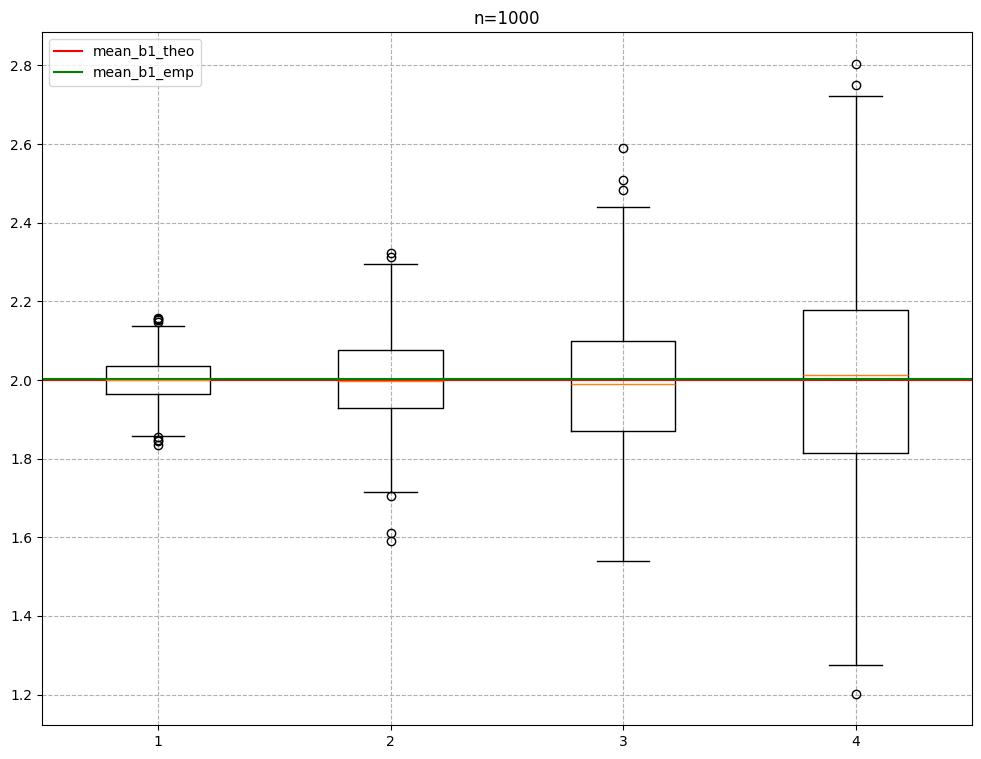

In [65]:
N = 1000
n_el = 1000
sigma = [1, 2, 3, 5]
b1 = 2

# rozkład normalny
b1_falka_list_list = []
b1_var_list = []
for sigma_el in sigma:
    b1_falka_list = np.zeros(N)
    arr = np.linspace(0, 1, n_el)
    x_mean = np.mean(arr)
    for i in range(N):
        eps = np.random.normal(0, sigma_el, n_el)
        yi = b1 * arr + eps
        b1_falka = np.sum(arr*yi) / np.sum(arr ** 2)
        b1_falka_list[i] = b1_falka
    b1_falka_list_list.append(b1_falka_list)
    mean_b1_emp = np.mean(b1_falka_list)
    mean_b1_theo = b1
    var_b1_emp = np.var(b1_falka_list)
    var_b1_theo = sigma_el ** 2 / np.sum(arr ** 2)
    b1_var_list.append([var_b1_theo, var_b1_emp])

plt.figure(figsize=(12,9))
plt.title(f'n={n_el}')
plt.boxplot(b1_falka_list_list)
plt.axhline(mean_b1_theo, color='r', label='mean_b1_theo')
plt.axhline(mean_b1_emp, color='g', label='mean_b1_emp')
plt.legend()
plt.grid(linestyle='--')
print(f'B1: {b1_var_list}')
plt.show()

# Zad3

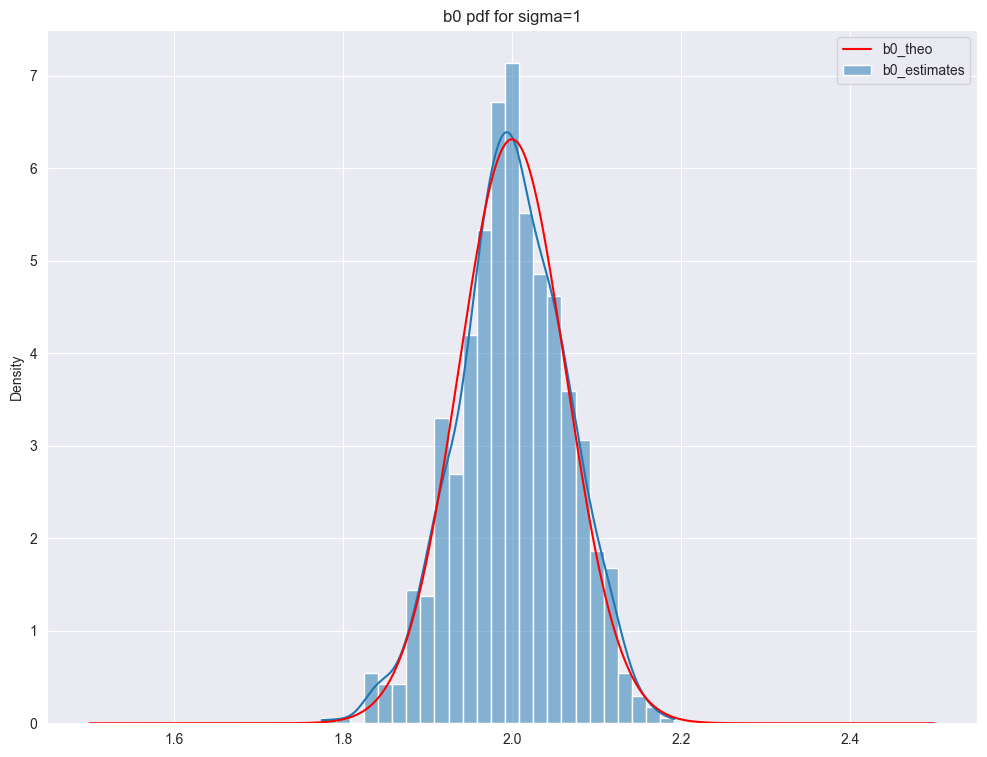

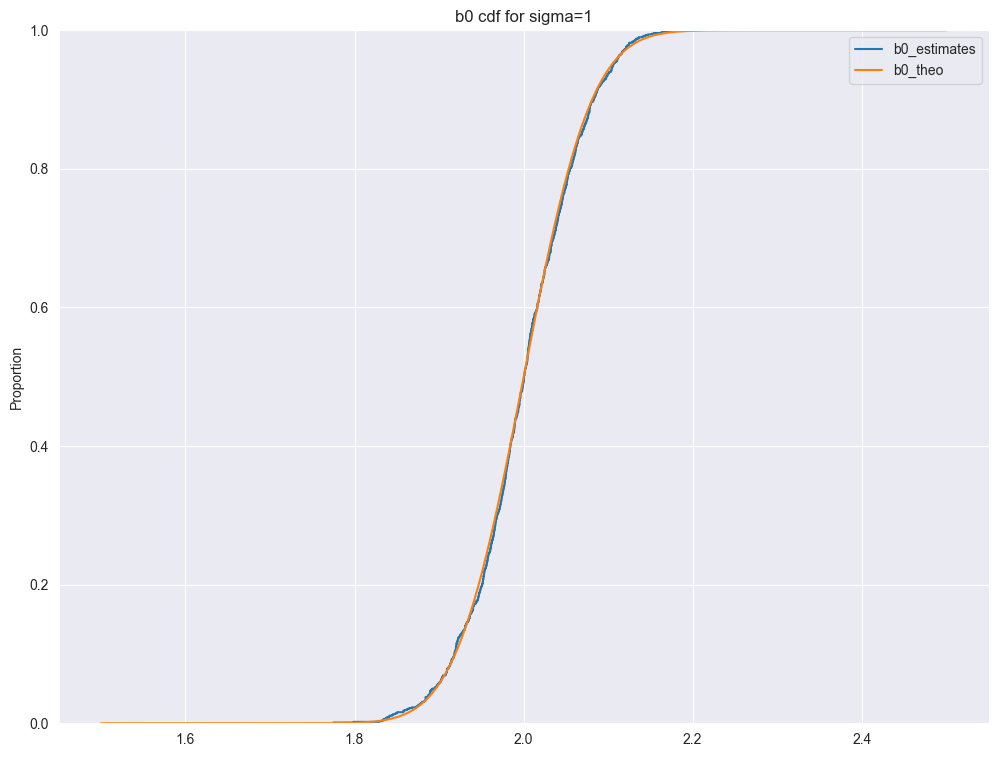

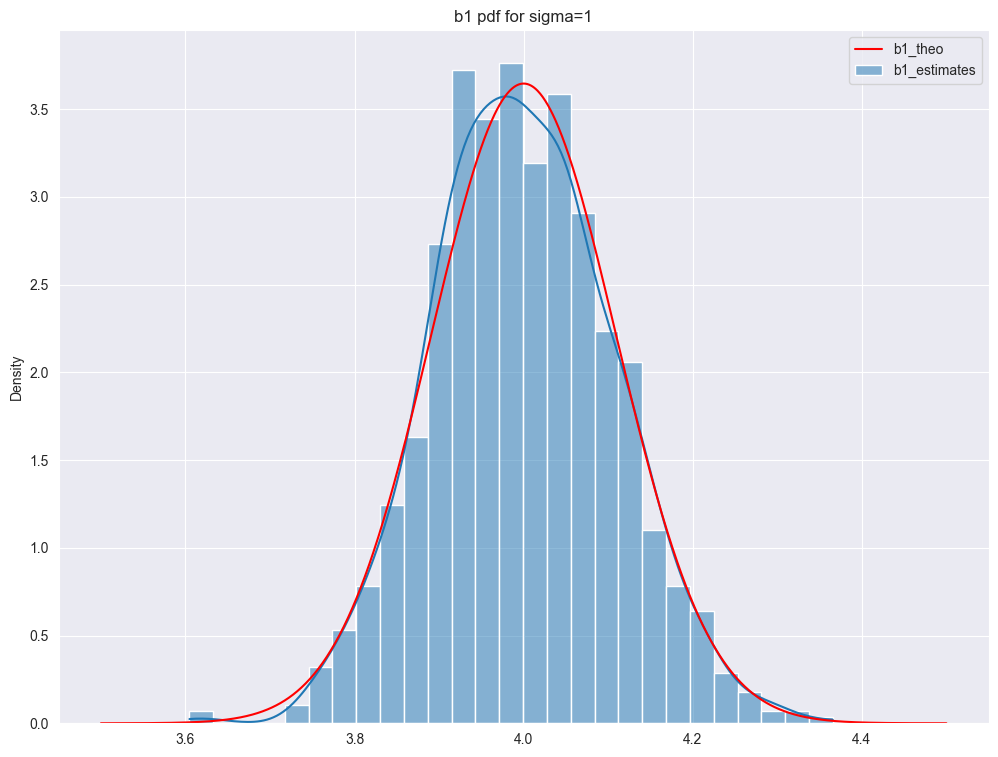

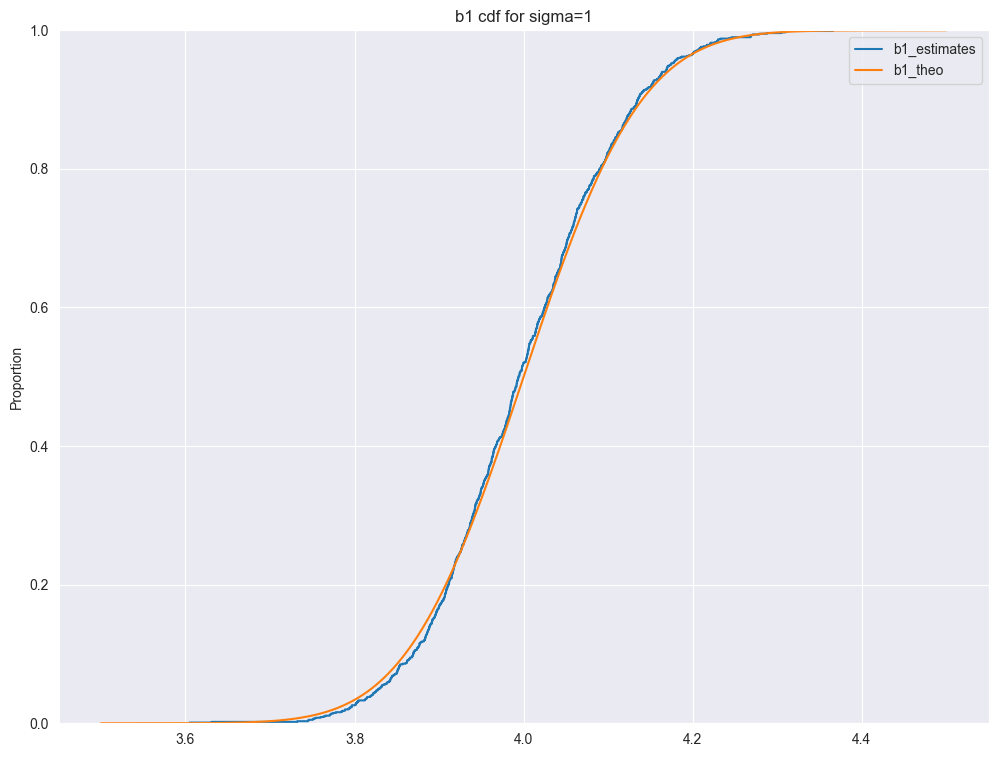

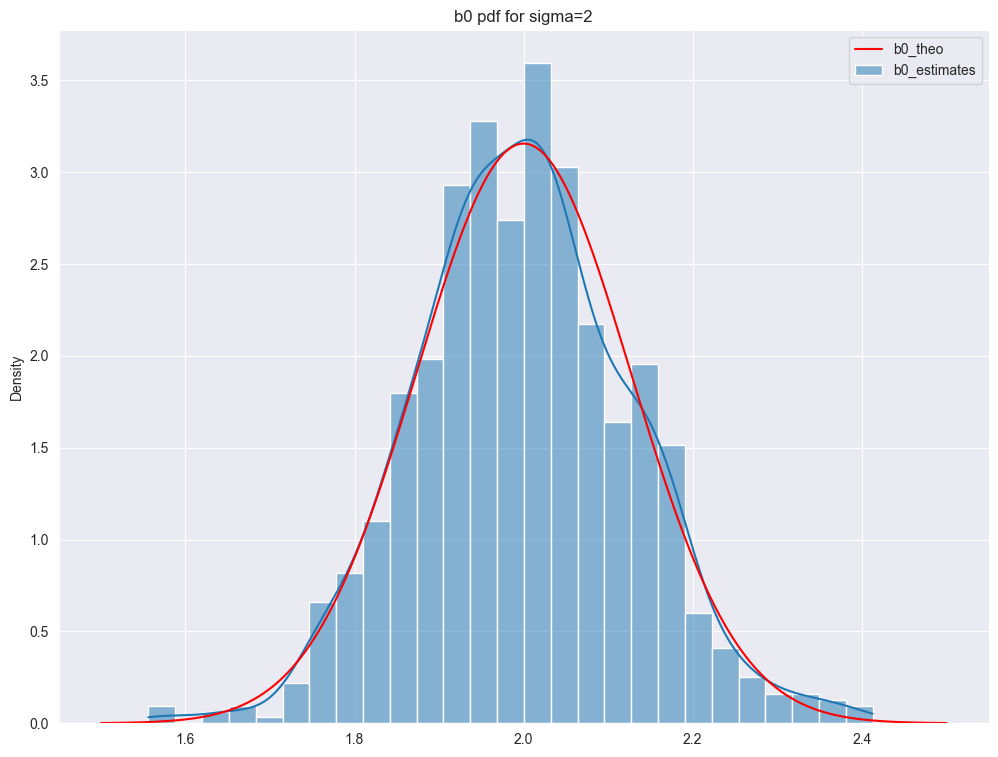

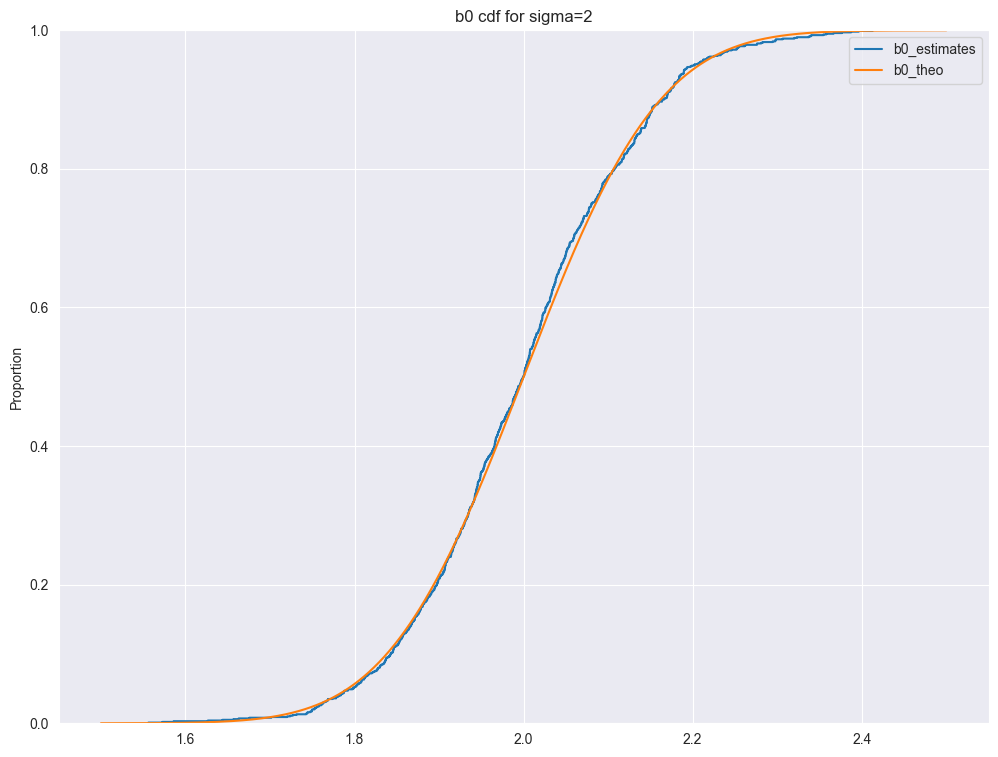

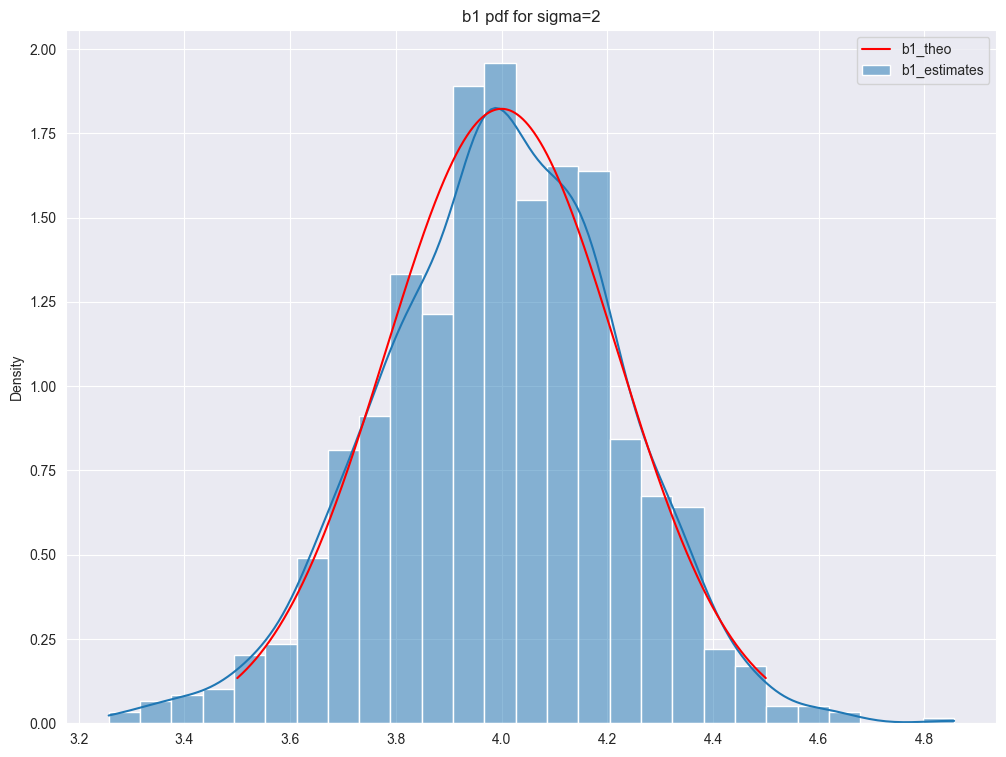

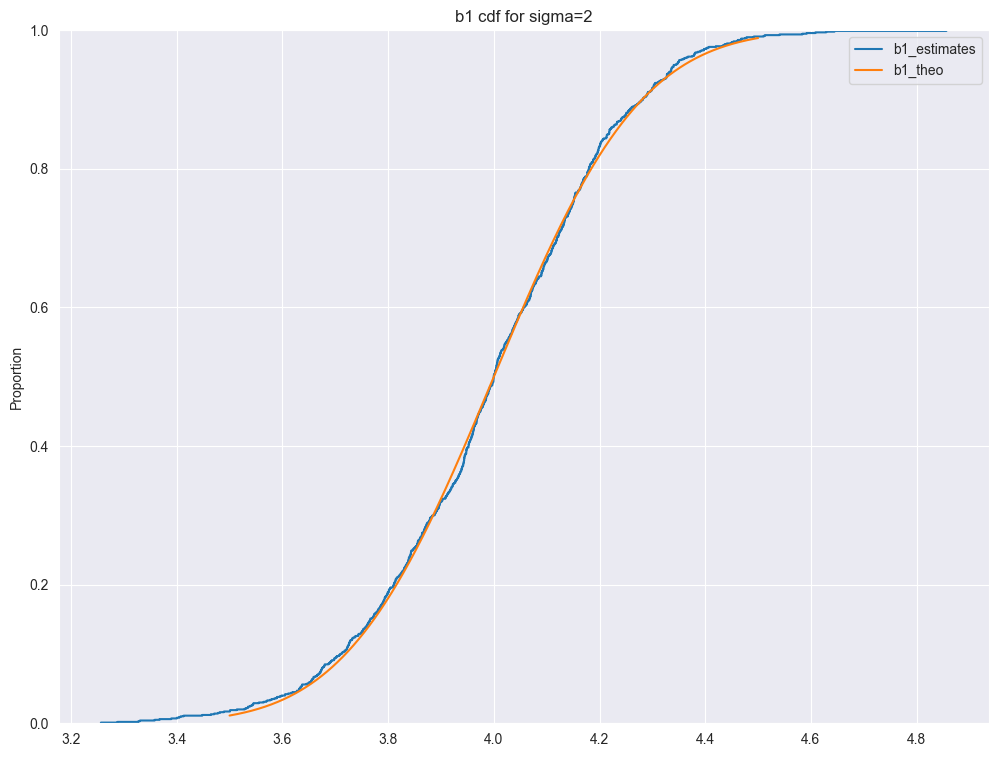

In [3]:
b0 = 2
b1 = 4
N = 1000
sigma = [1, 2]
xi = np.linspace(0, 1, 1000)


# Symulacja Monte Carlo
for sigma_el in sigma:
    b0_estimates = []
    b1_estimates = []
    for i in range(N):
        eps = np.random.normal(0, sigma_el, 1000)
        yi = b0 + b1 * xi + eps
        b1_est, b0_est = np.polyfit(xi, yi, deg=1)
        b0_estimates.append(b0_est)
        b1_estimates.append(b1_est)
    
    # Teoretyczne rozkłady dla b0 i b1
    X0 = np.linspace(1.5, 2.5, 1000)
    X1 = np.linspace(3.5, 4.5, 1000)
    
    var_b0 = (sigma_el**2) * (1/1000 + np.mean(xi)**2 / np.sum((xi - np.mean(xi))**2))
    var_b1 = (sigma_el**2) * (1/(np.sum((xi - np.mean(xi))**2)))
    
    b1_theo_cdf = norm.cdf(X1, b1, np.sqrt(var_b1))
    b0_theo_cdf = norm.cdf(X0, b0, np.sqrt(var_b0))
    
    b1_theo_pdf = norm.pdf(X1, b1, np.sqrt(var_b1))
    b0_theo_pdf = norm.pdf(X0, b0, np.sqrt(var_b0))
    
    # Wykresy
    plt.figure(figsize=(12,9))
    plt.title(f'b0 pdf for sigma={sigma_el}')
    sns.histplot(b0_estimates, label='b0_estimates', kde=True, stat='density')
    plt.plot(X0, b0_theo_pdf, color='r', label='b0_theo')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,9))
    plt.title(f'b0 cdf for sigma={sigma_el}')
    sns.ecdfplot(b0_estimates, label='b0_estimates')
    plt.plot(X0, b0_theo_cdf, label='b0_theo')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,9))
    plt.title(f'b1 pdf for sigma={sigma_el}')
    sns.histplot(b1_estimates, label='b1_estimates', kde=True, stat='density')
    plt.plot(X1, b1_theo_pdf, label='b1_theo', color='r')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,9))
    plt.title(f'b1 cdf for sigma={sigma_el}')
    sns.ecdfplot(b1_estimates, label='b1_estimates')
    plt.plot(X1, b1_theo_cdf, label='b1_theo')
    plt.legend()
    plt.show()
    

# Zad4

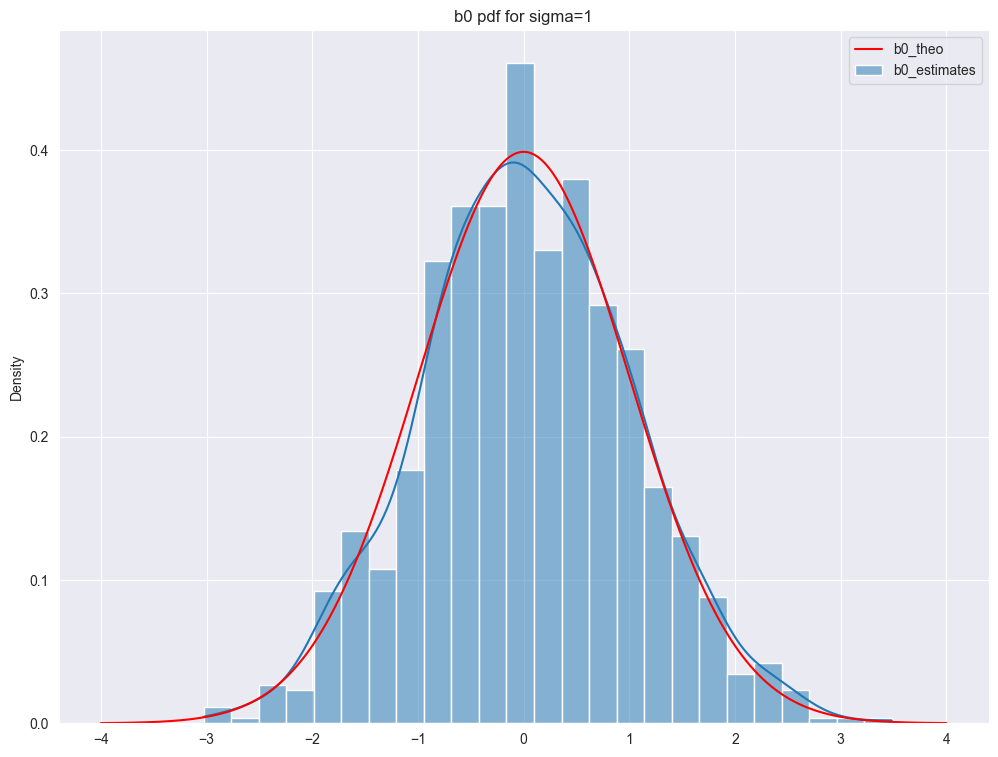

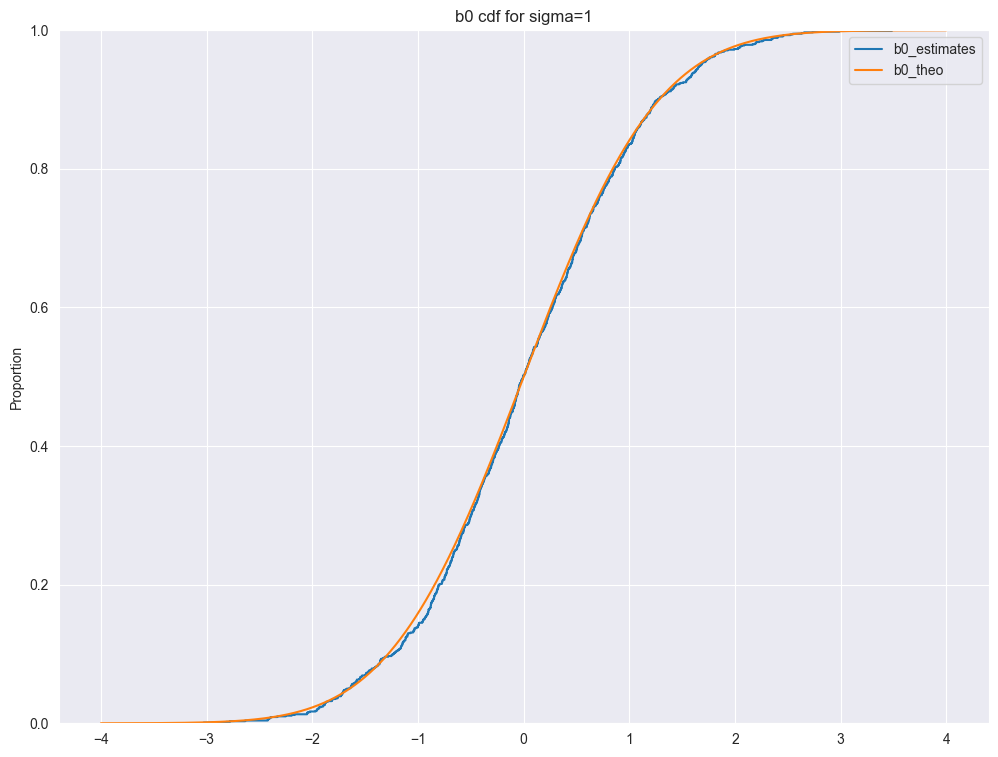

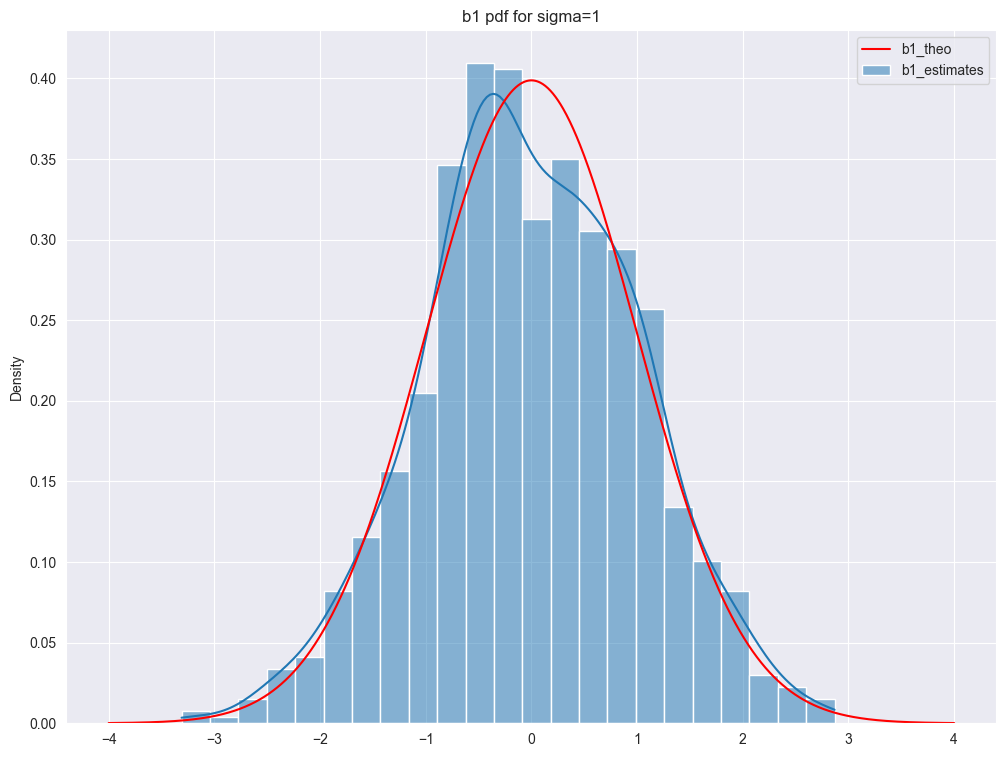

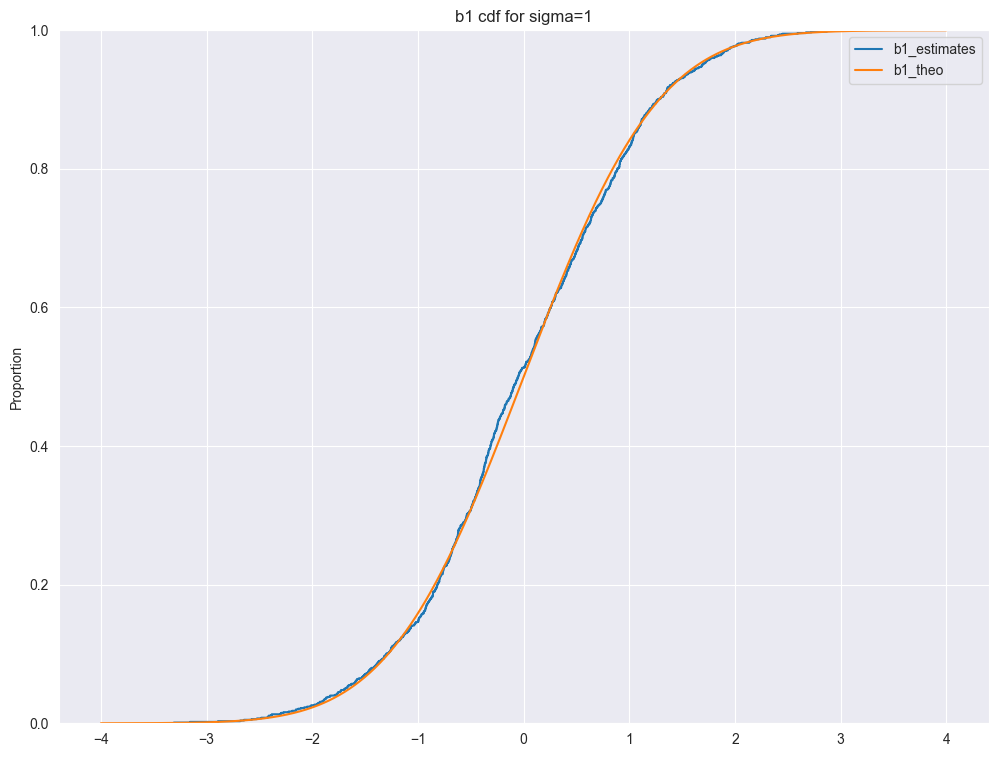

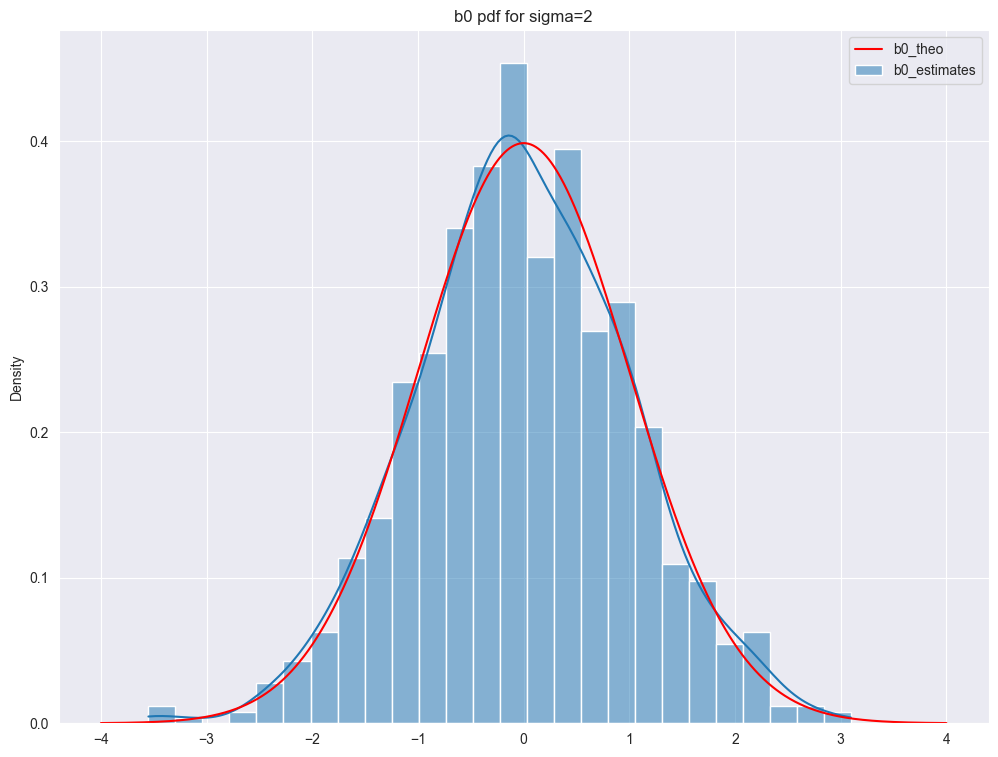

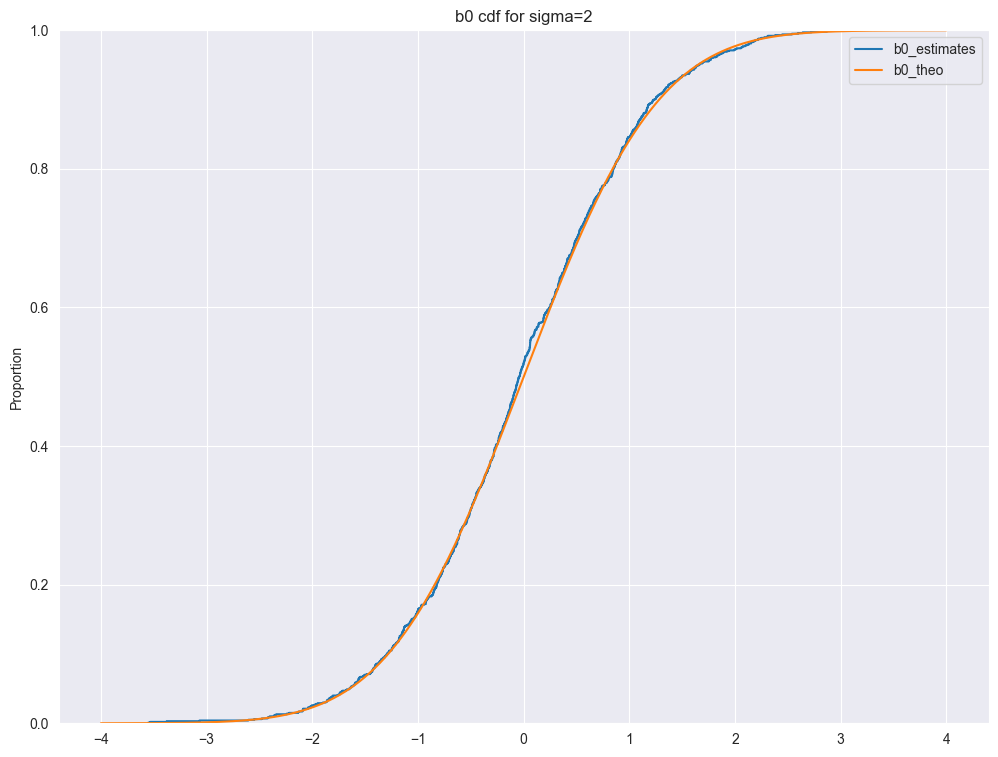

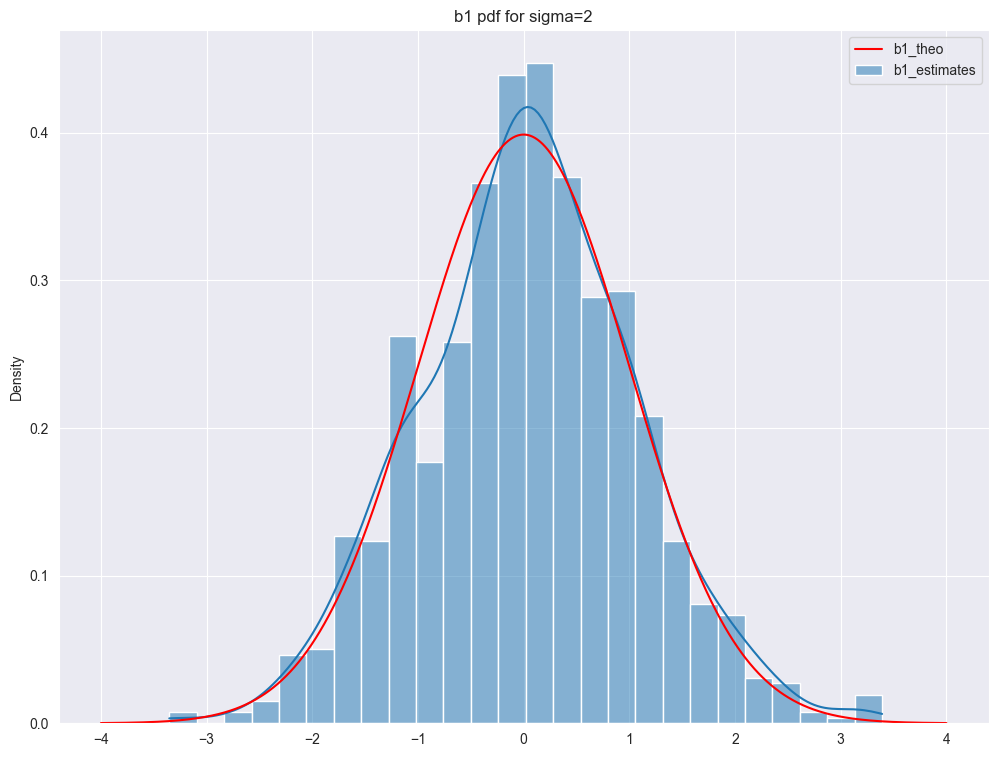

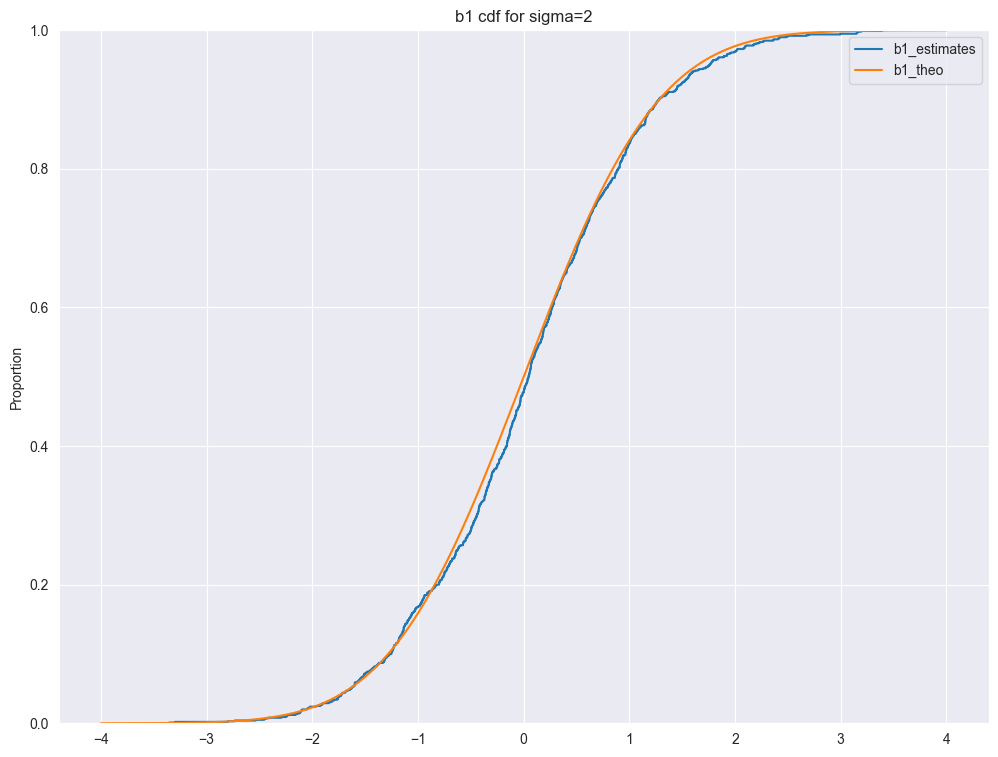

In [25]:
b0 = 2
b1 = 4
N = 1000
sigma = [1, 2]
xi = np.linspace(0, 1, N)


# Symulacja Monte Carlo
for sigma_el in sigma:
    b0_estimates = np.zeros(N)
    b1_estimates = np.zeros(N)
    for i in range(N):
        eps = np.random.normal(0, sigma_el, N)
        yi = b0 + b1 * xi + eps
        b1_est, b0_est = np.polyfit(xi, yi, deg=1)
        yi_est = b0_est + b1_est * xi
        
        Sx = np.mean(xi)
        Sxx = np.sum((xi - Sx)**2)
        
        var_est = np.sum((yi - yi_est)**2) / (N - 2)
        dev = np.sqrt(var_est)
        b1_estimates[i] = (b1_est - b1) / np.sqrt((var_est/Sxx))
        b0_estimates[i] = (b0_est - b0) / np.sqrt((var_est * (1/N + Sx**2/Sxx)))
        
    # Teoretyczne rozkłady dla b0 i b1
    X = np.linspace(-4, 4, N)
    
    b1_theo_cdf = t.cdf(X, N-2)
    b0_theo_cdf = b1_theo_cdf
    
    b1_theo_pdf = t.pdf(X, N-2)
    b0_theo_pdf = b1_theo_pdf
    
    # Wykresy
    plt.figure(figsize=(12,9))
    plt.title(f'b0 pdf for sigma={sigma_el}')
    sns.histplot(b0_estimates, label='b0_estimates', kde=True, stat='density')
    plt.plot(X, b0_theo_pdf, color='r', label='b0_theo')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,9))
    plt.title(f'b0 cdf for sigma={sigma_el}')
    sns.ecdfplot(b0_estimates, label='b0_estimates')
    plt.plot(X, b0_theo_cdf, label='b0_theo')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,9))
    plt.title(f'b1 pdf for sigma={sigma_el}')
    sns.histplot(b1_estimates, label='b1_estimates', kde=True, stat='density')
    plt.plot(X, b1_theo_pdf, label='b1_theo', color='r')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,9))
    plt.title(f'b1 cdf for sigma={sigma_el}')
    sns.ecdfplot(b1_estimates, label='b1_estimates')
    plt.plot(X, b1_theo_cdf, label='b1_theo')
    plt.legend()
    plt.show()
    

# Zad5

In [4]:
def least_squares(data1, data2):
    x_mean = np.mean(data1)
    y_mean = np.mean(data2)
    b1 = np.sum((data1 - x_mean) * data2) / np.sum((data1 - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    return b0, b1

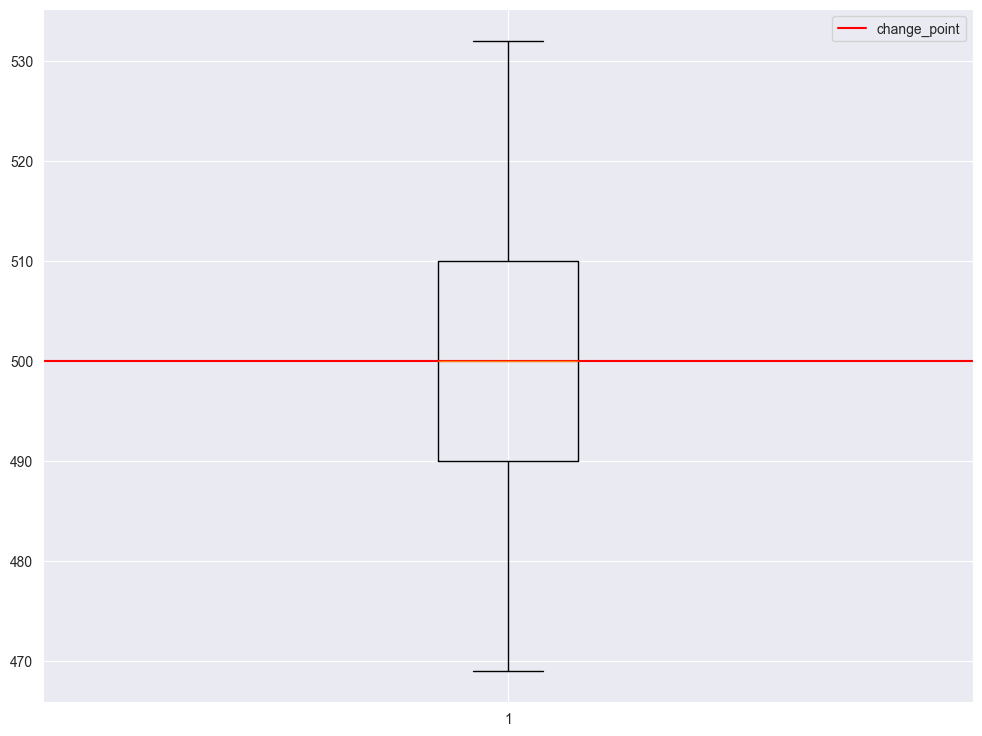

In [5]:
sigma = np.sqrt(6)
n = 1000
MC = 50
change_point = 500

x = np.arange(1, n+1)

k_list = []
for _ in range(MC):
    V_list = []
    for k in range(2, n-1):
        Y_i = np.concatenate([np.random.normal(0, sigma, change_point), np.random.normal(0, 1, n-change_point)])
        C_m = np.cumsum(Y_i ** 2)
        C1 = C_m[:k]
        C2 = C_m[k:]
        x1 = x[:k]
        x2 = x[k:]
        a0, a1 = least_squares(x1, C1)
        b0, b1 = least_squares(x2, C2)
        V = np.sum((C1-(a0+a1*x1))**2) + np.sum((C2-(b0+b1*x2))**2)
        V_list.append(V)
    k_emp = np.argmin(V_list)
    k_list.append(k_emp)

plt.figure(figsize=(12,9))

plt.boxplot(k_list)
plt.axhline(change_point, color='r', label='change_point')
plt.legend()
plt.show()

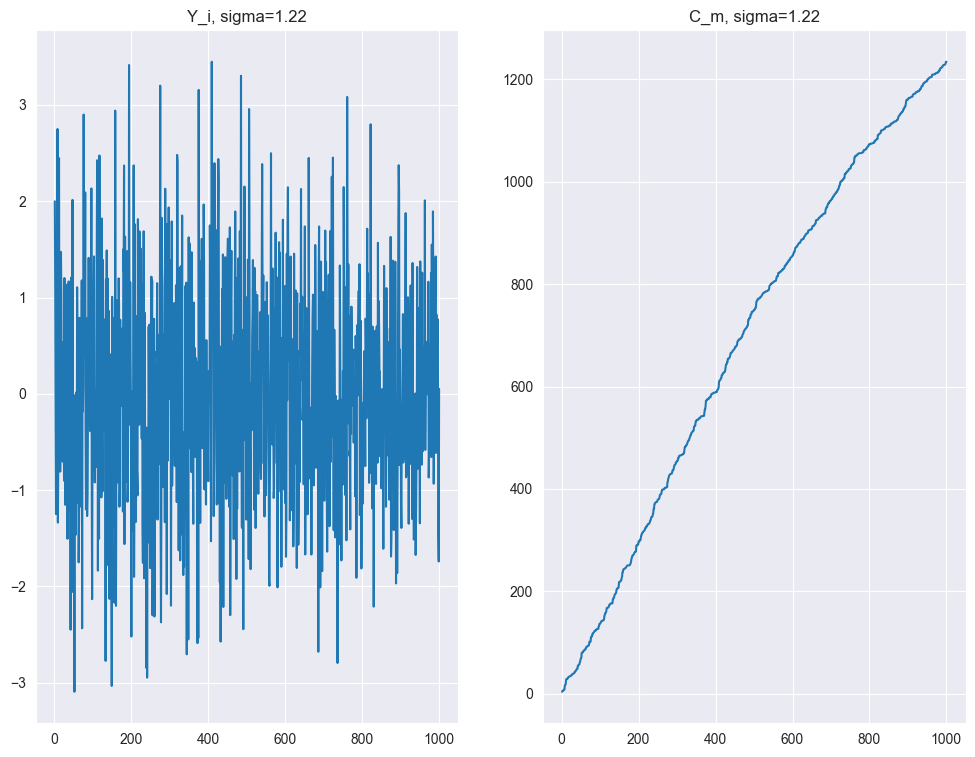

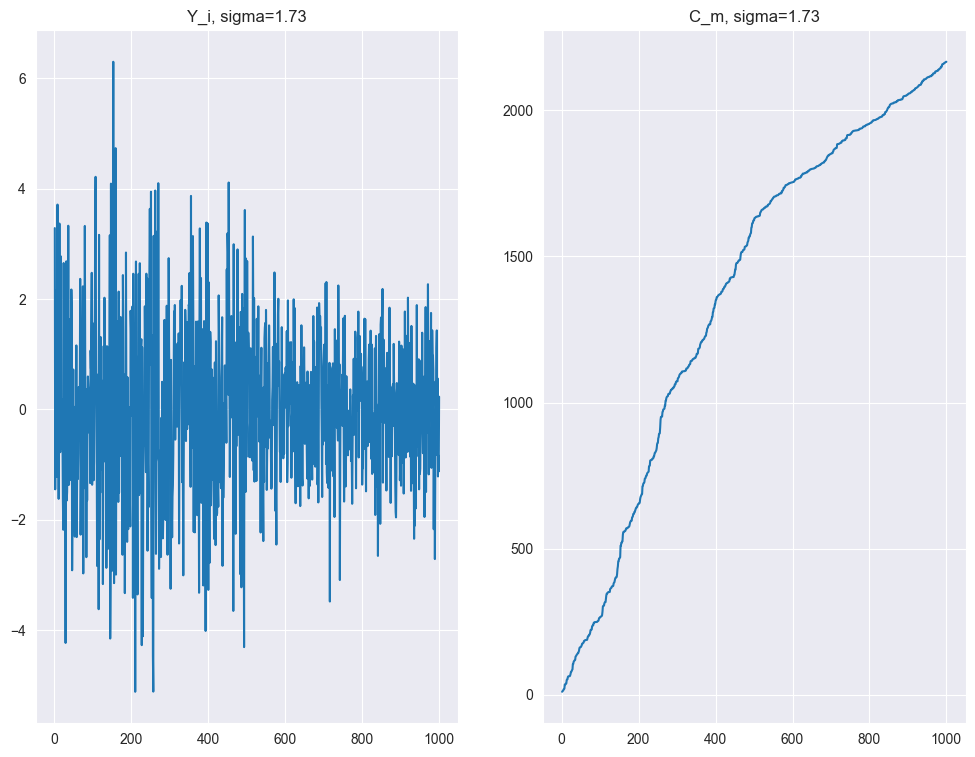

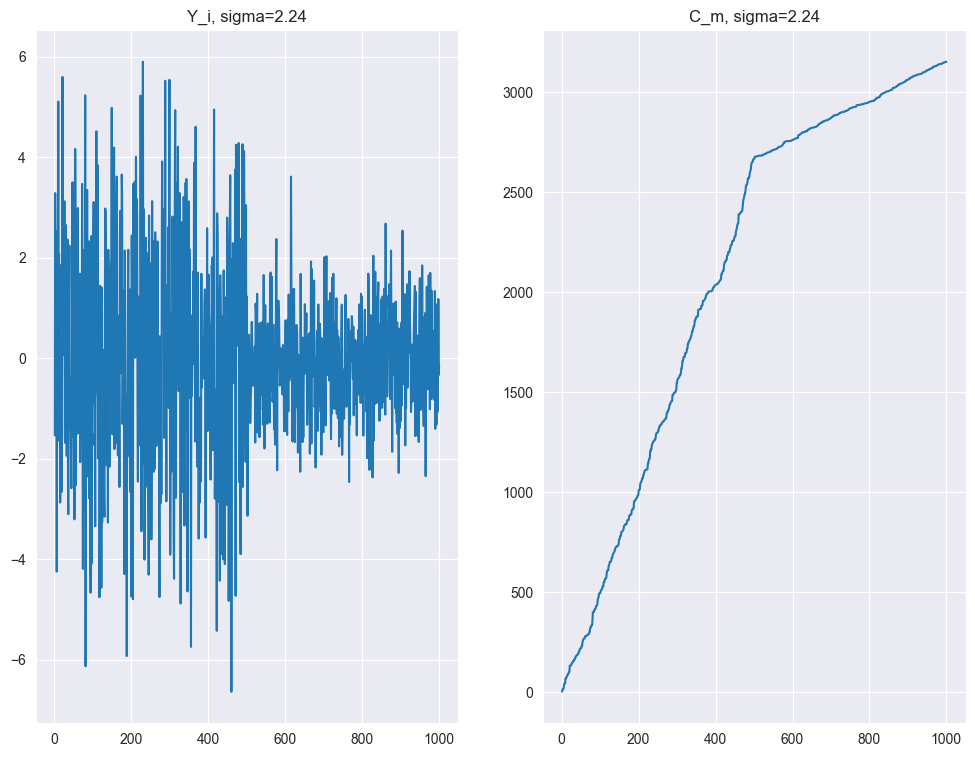

In [14]:
sigma_list = [np.sqrt(1.5), np.sqrt(3), np.sqrt(5)]


for sigma in sigma_list:
    Y_i = np.concatenate([np.random.normal(0, sigma, change_point), np.random.normal(0, 1, n-change_point)])
    C_m = np.cumsum(Y_i ** 2)
    
    
    plt.figure(figsize=(12,9))
    plt.subplot(121)
    
    ax1 = plt.subplot(121)
    plt.plot(x, Y_i)
    plt.title(f'Y_i, sigma={sigma.round(2)}')
    
    ax2 = plt.subplot(122)
    plt.plot(x, C_m)
    plt.title(f'C_m, sigma={sigma.round(2)}')
    plt.show()